In [1]:
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from geopy import distance
import math
import re

In [2]:
OPeNDAP_url = 'https://thredds.met.no/thredds/dodsC/ww3_4km_latest_files/ww3_C2_SPC_20241216T00Z.nc'
ds =  xr.open_dataset(OPeNDAP_url)
ds

<xarray.Dataset> Size: 579MB
Dimensions:                  (direction: 36, freq: 36, x: 763, y: 1, time: 73)
Coordinates:
  * direction                (direction) float32 144B 5.0 15.0 ... 345.0 355.0
  * freq                     (freq) float32 144B 0.03452 0.03798 ... 0.9702
  * x                        (x) int32 3kB 1 2 3 4 5 6 ... 759 760 761 762 763
  * y                        (y) int32 4B 1
  * time                     (time) datetime64[ns] 584B 2024-12-15T18:00:00 ....
    longitude                (y, x) float32 3kB ...
    latitude                 (y, x) float32 3kB ...
Data variables:
    forecast_reference_time  datetime64[ns] 8B ...
    SPEC                     (time, y, x, freq, direction) float64 577MB ...
    ff                       (time, y, x) float64 446kB ...
    dd                       (time, y, x) float64 446kB ...
    Pdir                     (time, y, x) float32 223kB ...
    hs                       (time, y, x) float32 223kB ...
    tp                       (time, y, x) float32 223kB ...
Attributes:
    title:                           2D wave spectra
    history:                         Mon Dec 16 03:27:59 2024: ncks -A -v hs,...
    history_of_appended_files:       Mon Dec 16 03:27:59 2024: Appended file ...
    NCO:                             netCDF Operators version 5.0.6 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
ds.latitude

<xarray.DataArray 'latitude' (y: 1, x: 763)> Size: 3kB
[763 values with dtype=float32]
Coordinates:
  * x          (x) int32 3kB 1 2 3 4 5 6 7 8 ... 756 757 758 759 760 761 762 763
  * y          (y) int32 4B 1
    longitude  (y, x) float32 3kB ...
    latitude   (y, x) float32 3kB ...
Attributes:
    standard_name:  latitude
    units:          degree_north
    long_name:      latitude

In [4]:
res = ds.longitude
res.values

array([[ 7.0708,  7.0782,  7.0856,  7.0931,  7.1006,  7.108 ,  7.1155,
         7.1229,  7.1304,  7.1379,  7.1454,  7.1529,  7.1604,  7.1679,
         7.1753,  7.1828,  7.1904,  7.1978,  7.2053,  7.2128,  7.2204,
         7.2279,  7.2354,  7.243 ,  7.2505,  7.258 ,  7.2655,  7.2731,
         7.2806,  7.2882,  7.2958,  7.3033,  7.3108,  7.3184,  7.326 ,
         7.3336,  7.3412,  7.3487,  7.3563,  7.364 ,  7.3715,  7.3791,
         7.3867,  7.3943,  7.4019,  7.4095,  7.4171,  7.4248,  7.4324,
         7.44  ,  7.4476,  7.4553,  7.4629,  7.4705,  7.4782,  7.4859,
         7.4935,  7.5012,  7.5088,  7.5165,  7.5242,  7.5319,  7.5395,
         7.5472,  7.5549,  7.5625,  7.5703,  7.5779,  7.5857,  7.5934,
         7.601 ,  7.6088,  7.6165,  7.6242,  7.6319,  7.6396,  7.6474,
         7.6552,  7.6629,  7.6706,  7.6784,  7.6861,  7.6939,  7.7016,
         7.7094,  7.7172,  7.7249,  7.7327,  7.7405,  7.7482,  7.756 ,
         7.7638,  7.7716,  7.7794,  7.7872,  7.795 ,  7.8028,  7.8107,
      

In [5]:
len(ds.latitude.values[0]), len(ds.longitude.values[0])

(763, 763)

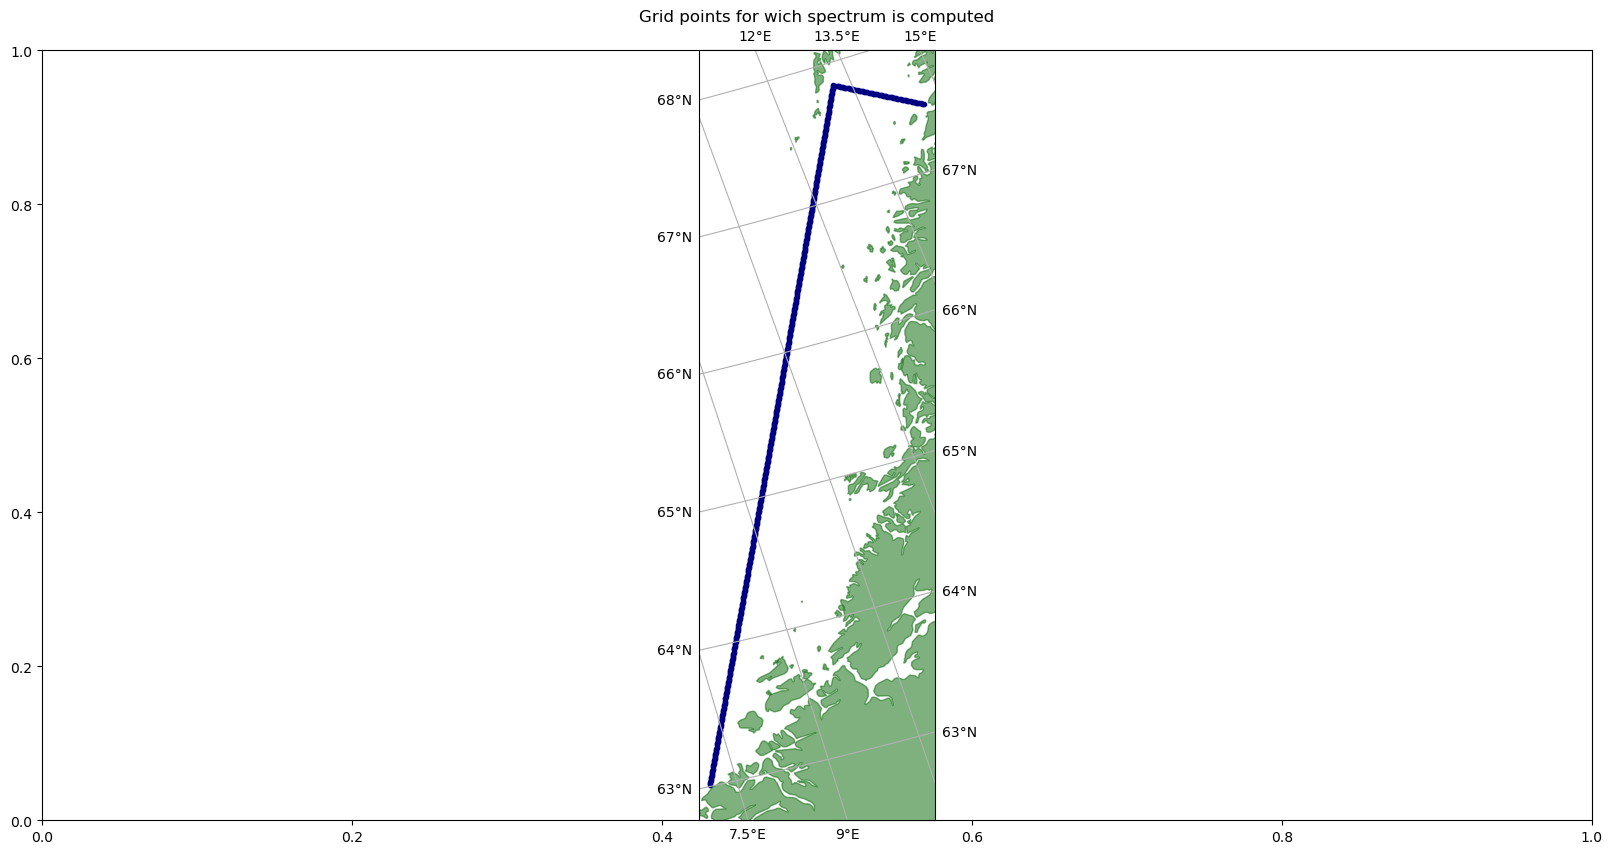

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.add_feature(cfeature.LAND,color='darkgreen', alpha = 0.5)
#ax.add_feature(cfeature.LAKES)
#ax.coastlines(resolution='50m', color='darkkhaki', linewidth=0.5)
ax.scatter(ds.longitude,ds.latitude,marker='.', color='navy', transform=ccrs.PlateCarree())
ax.set_title("Grid points for wich spectrum is computed")
ax.gridlines(draw_labels=True)